# My SSGA

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import EntropyRateSuperpixel as ERS
import MyDataset as Data
import LambdaCoeff as LC

import SSGA

### Import dataset

145 145 200


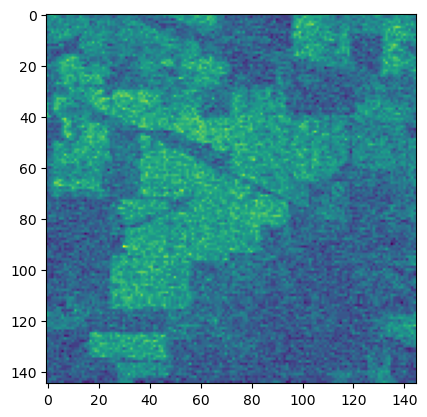

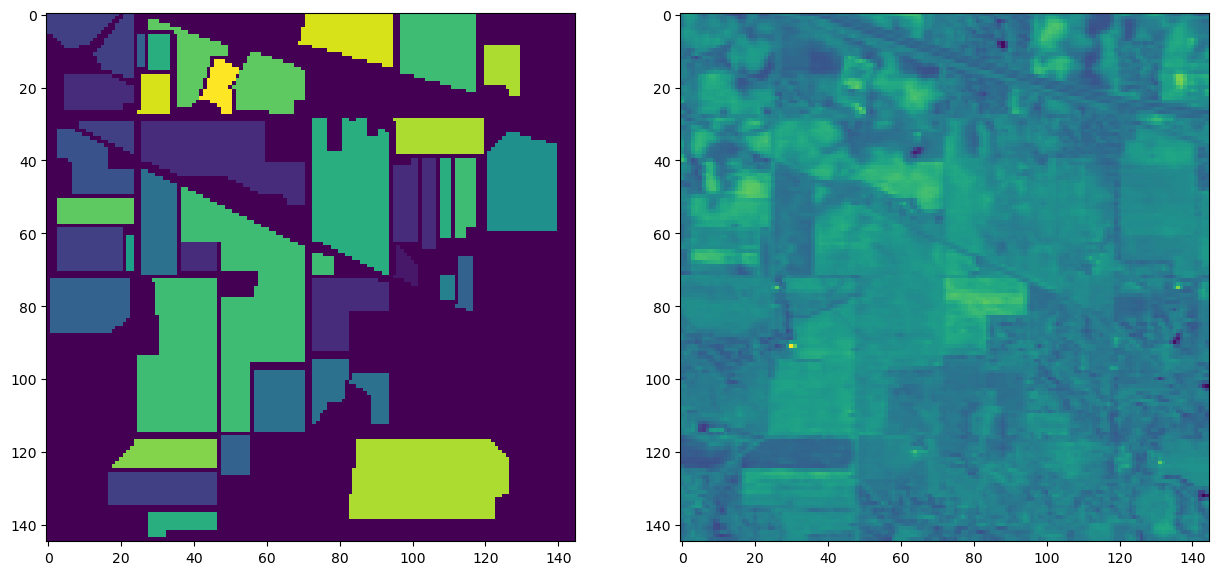

In [2]:

usedDataset = Data.IndianPines
#usedDataset = Data.PaviaUniversity
#usedDataset = Data.PaviaCenter


N,M,B = usedDataset["shape"]
print(N,M,B)


b = np.random.randint(0, B-1)
plt.imshow(usedDataset["data"][:,:,b])
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[1].imshow(np.average(usedDataset["data"], axis=2))
plt.show()

### Compute SPs

In [56]:
K = 300
trainData = Data.standardize_data(usedDataset["data"])
SPs = ERS.find_superpixel(trainData, K, int(LC.getLambdaNorm1(K,N,M)), ERS.complete_norm1_similarity, True)
Classifiers = {b:ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"], counting0=b) for b in [True, False]}

In [16]:
K = 100
print(LC.computePs(K,N,M))
trainData = Data.standardize_data(usedDataset["data"])
SPs = ERS.find_superpixel(trainData, K, 15, ERS.complete_cosine_similarity, True)
Classifiers = {b:ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"], counting0=b) for b in [True, False]}
len_liste = [len(SP) for SP in SPs]
len_liste.sort()
print(len_liste)

18
[3, 76, 105, 115, 126, 128, 129, 135, 136, 139, 142, 142, 144, 145, 150, 150, 152, 156, 159, 160, 163, 165, 166, 167, 168, 170, 170, 172, 173, 174, 176, 177, 178, 181, 181, 181, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 200, 201, 206, 210, 214, 215, 220, 221, 223, 225, 227, 228, 230, 230, 232, 232, 233, 233, 234, 235, 239, 239, 240, 240, 240, 242, 248, 248, 249, 249, 250, 253, 253, 253, 260, 262, 266, 267, 272, 272, 276, 280, 282, 283, 288, 289, 296, 306, 310, 323, 325, 330, 332, 351]


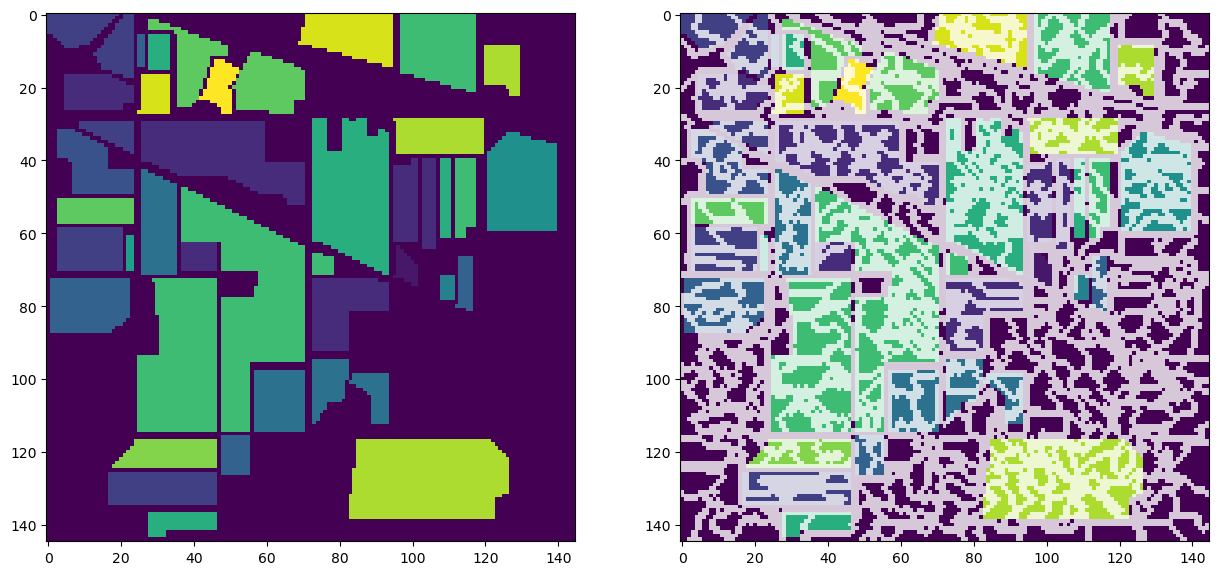

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[1].imshow(usedDataset["gt"])
axs[1].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs, color=[255,255,255,200]))
plt.show()

### Time series processing

In [58]:
TS = []
for SP in SPs:
    TS.append(np.array([trainData[x,y] for x,y in SP]))

In [72]:
k1 = np.random.randint(0, K-1)
print(k1)
print(len(SPs[k1]))

208
108


In [121]:
k2 = np.random.randint(0, K-1)
print(k2)
print(len(SPs[k2]))

179
65


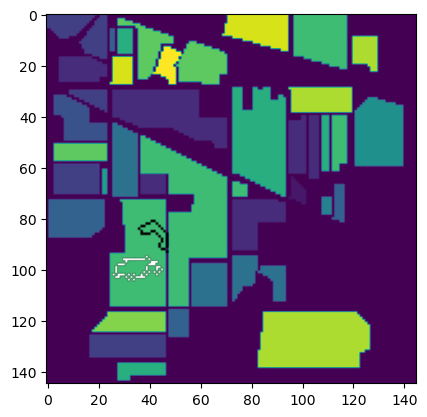

In [122]:
plt.imshow(usedDataset["gt"])
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], [SPs[k1]], color=[255,255,255,255]))
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], [SPs[k2]], color=[0,0,0,255]))
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.9626297191929263
[0.27213981 0.11522215 0.10264736 0.06932559 0.05420017 0.05042908]


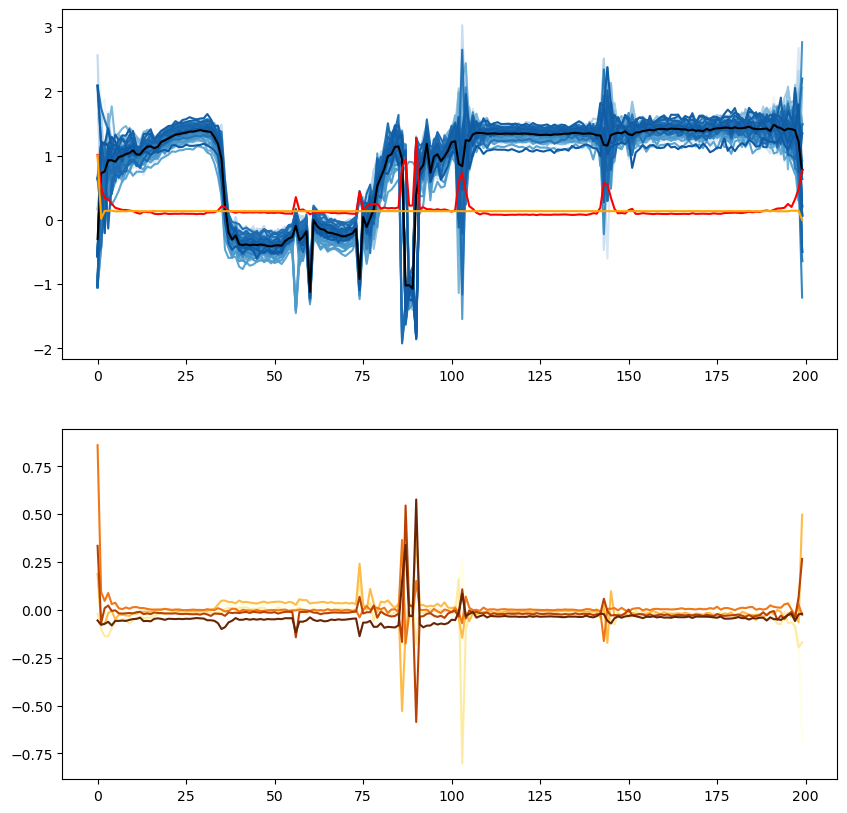

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.9276253102499148
[0.4648681  0.09150543 0.07361357 0.06489792 0.04539635 0.04077185]


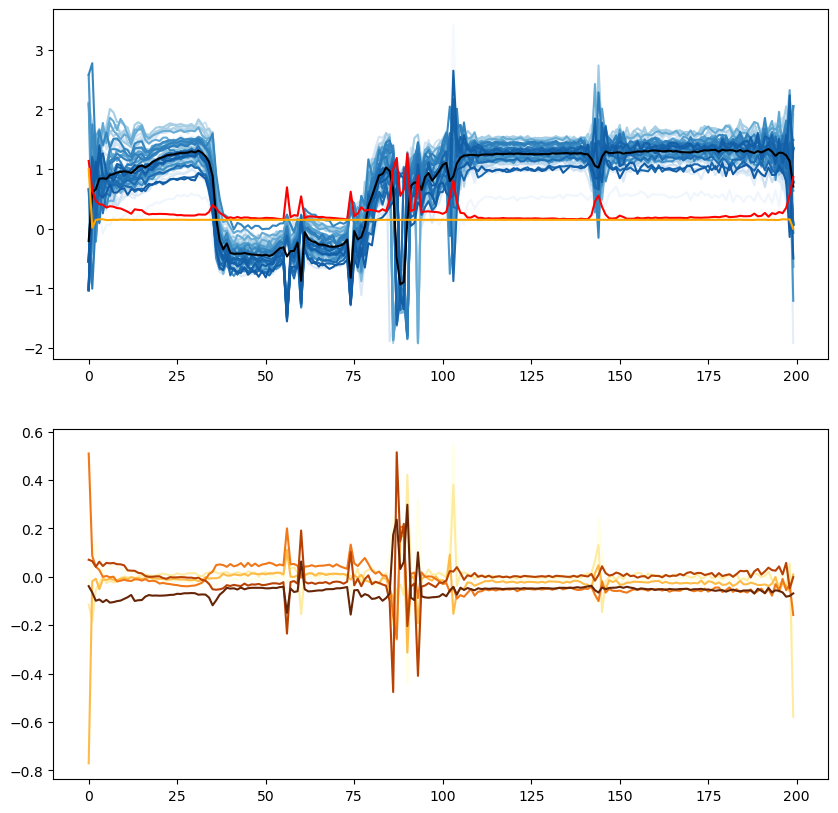

In [123]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

def normalize(vec):
    arr = np.array(vec)
    mini = arr.min()
    maxi = arr.max()
    if mini==maxi:
        return arr/len(arr)
    return (arr-mini)/(maxi-mini)



n_comp = 6
Bs = np.arange(0, B)

for i, k in enumerate([k1,k2]):
    fig, axs = plt.subplots(2, figsize=(10,10))
    TS_colors = mpl.colormaps["Blues"](np.linspace(0, 1, int(1.2*len(TS[k]))))
    for c,arr in enumerate(TS[k]):
        axs[0].plot(Bs, arr, "-", color=TS_colors[c])

    axs[0].plot(Bs, np.average(TS[k], axis=0), "-", color="black", label="average")
    axs[0].plot(Bs, np.std(TS[k], axis=0), "-", color="red", label="standard deviation")
    spectra = np.fft.fft(TS[k], axis=1)**2
    spectral_fourier_profile = np.mean(spectra, axis=0)
    axs[0].plot(Bs, normalize(spectral_fourier_profile), "-",color="orange", label="Spectral Profile")

    similarites = cosine_similarity(TS[k])
    print(np.mean(similarites[np.triu_indices_from(similarites, k=1)]))

    pca = PCA(n_components=n_comp)
    pcs = pca.fit_transform(TS[k])
    print(pca.explained_variance_ratio_)
    comp_colors = mpl.colormaps["YlOrBr"](np.linspace(0, 1, n_comp))
    for c in range(n_comp):
        axs[1].plot(Bs, pca.components_[n_comp-1-c], "-", color=comp_colors[c])


    plt.show()

In [ ]:
def CosineSim(x,y):
    #CosineSim
    return 1-(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)) +1)/2

0.11387840440206709
0.21177672228200295


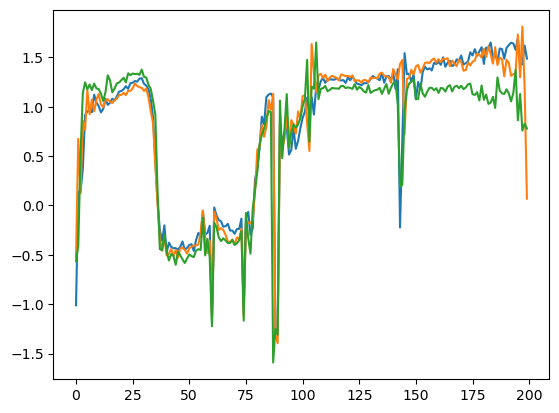

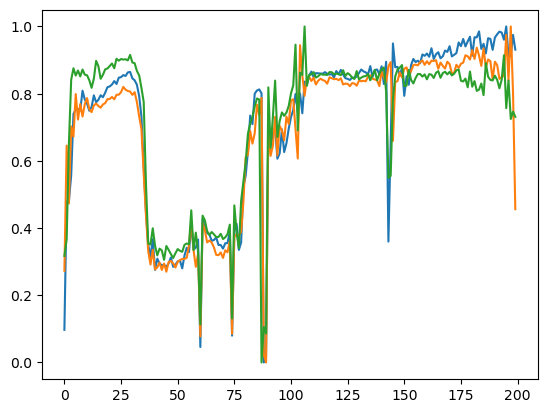

0.009899920703309917
0.02074713648681592


In [46]:
px = TS[k1][0]
py = TS[k1][2]

pz = TS[k2][0]

print(ERS.norm1_similarity(px, py, False))
print(ERS.norm1_similarity(px, pz, False))
plt.plot(Bs, px, "-")
plt.plot(Bs, py, "-")
plt.plot(Bs, pz, "-")
plt.show()


plt.plot(Bs, normalize(px), "-")
plt.plot(Bs, normalize(py), "-")
plt.plot(Bs, normalize(pz), "-")
plt.show()
print(CosineSim(px,py))
print(CosineSim(px,pz))

### Merge SPs

In [18]:
def SP_average(data, SP):
    N,M,B = data.shape
    res = np.zeros(B)
    for x,y in SP:
        res += data[x,y,:]
    return res/len(SP)


def squaredDist(a, b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

def SP_weighted_average(data, SP):
    c = np.average(SP, axis=0)
    dists = np.array([np.exp(-0.5*squaredDist(a, c)**0.5) for a in SP])
    if dists.max()-dists.min()!=0:
        dists = (dists-dists.min())/(dists.max()-dists.min())
    else:
        dists = [1/len(dists) for _ in range(len(SP))]

    N,M,B = data.shape
    res = np.zeros(B)
    for i,(x,y) in enumerate(SP):
        res += dists[i] * data[x,y,:]
    return res/len(SP)


def norm1(x,y):
    return np.abs(x-y).sum()/len(x)

def norm2(x,y):
    return ((x-y)**2).sum()/len(x)


def merge_SPs_basic(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_average(data, SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1], SPs_liste[j][1]) for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        SPs_liste[k1] = [SP_union, SP_average(data, SP_union)] #Opti to compute average easy without dividing by len(SP)
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]
       


def merge_SPs_v2(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_weighted_average(data, SP)*len(SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1]/len(SPs_liste[i][0]),
                         SPs_liste[j][1]/len(SPs_liste[j][0]))
                    for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        SPs_liste[k1] = [SP_union, SPs_liste[k1][1] + SPs_liste[k2][1]]
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1]/len(SPs_liste[k1][0]),
                                        SPs_liste[k][1]/len(SPs_liste[k][0]))
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1]/len(SPs_liste[k1][0]),
                                        SPs_liste[k][1]/len(SPs_liste[k1][0]))
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]



def merge_SPs_v3(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_average(data, SP), len(SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1], SPs_liste[j][1]) for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        selected = k1 if SPs_liste[k1][2] > SPs_liste[k2][2] else k2
        SPs_liste[k1] = [SP_union, SPs_liste[selected][1], len(SP_union)]
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1], SPs_liste[k][1]) #Opti to compute average easy without dividing by len(SP)
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]
       

    
        
from sklearn.cluster import KMeans
def merge_SPs_kmeans(data, SPs, L):
    nb_cluster = L
    kmeans = KMeans(n_clusters=nb_cluster, n_init="auto")
    features = [SP_average(data, SP) for SP in SPs]
    kmeans.fit(features)

    SPs_merged = [[] for _ in range(nb_cluster)]
    for i in range(len(kmeans.labels_)):
        SPs_merged[kmeans.labels_[i]] += SPs[i]
    return SPs_merged



from sklearn.cluster import AgglomerativeClustering
def merge_Sps_agglomerative(data, SPs, L):
    features = [SP_average(data, SP) for SP in SPs]
    clustering = AgglomerativeClustering(n_clusters=L, linkage='ward')
    labels = clustering.fit_predict(features)

    SPs_merged = [[] for _ in range(L)]
    for i in range(len(labels)):
        SPs_merged[labels[i]] += SPs[i]
    return SPs_merged


from sklearn.cluster import SpectralClustering
def merge_Sps_spectral(data, SPs, L):
    features = [SP_average(data, SP) for SP in SPs]
    clustering = SpectralClustering(n_clusters=L, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = clustering.fit_predict(features)

    SPs_merged = [[] for _ in range(L)]
    for i in range(len(labels)):
        SPs_merged[labels[i]] += SPs[i]
    return SPs_merged


In [19]:
dataForMerges = Data.standardize_data(usedDataset["data"])
SPsUsedForMerges = {b:[SP.pixels for SP in Classifiers[b].SPs] for b in Classifiers.keys()}

L = 20
print("number of labels:", len(usedDataset["labels"]))
print("number of clusters:", L)

mergedSPsDic = {key:[SPs,
             merge_SPs_basic(dataForMerges, SPs, L, simFun=norm2),
             merge_SPs_v2(dataForMerges, SPs, L, simFun=norm2),
             merge_SPs_v3(dataForMerges, SPs, L, simFun=norm2),
             merge_SPs_kmeans(dataForMerges, SPs, L),
             merge_Sps_agglomerative(dataForMerges, SPs, L),
             merge_Sps_spectral(dataForMerges, SPs, L)]

             for key,SPs in SPsUsedForMerges.items()}

merged_SPs_names = ["without", "v1", "v2", "v3", "kmeans", "agglomerative", "SpectralClustering"]

number of labels: 17
number of clusters: 20


300
[72, 82, 49, 57, 76, 50, 90, 100, 50, 69, 72, 64, 93, 74, 54, 45, 83, 64, 55, 43, 52, 56, 68, 48, 39, 52, 52, 92, 88, 65, 70, 68, 84, 82, 75, 104, 64, 63, 38, 77, 91, 84, 50, 81, 82, 51, 87, 101, 77, 48, 75, 96, 53, 79, 69, 86, 60, 59, 51, 64, 93, 71, 82, 76, 58, 56, 34, 58, 58, 90, 63, 100, 83, 53, 55, 72, 75, 55, 66, 44, 59, 75, 68, 59, 87, 76, 50, 60, 62, 55, 85, 82, 100, 73, 51, 61, 78, 63, 88, 67, 69, 40, 102, 84, 68, 74, 96, 63, 58, 95, 89, 62, 46, 84, 93, 57, 90, 60, 52, 84, 51, 60, 58, 61, 52, 81, 59, 79, 67, 80, 100, 75, 61, 62, 80, 93, 111, 82, 65, 51, 76, 70, 63, 59, 68, 82, 82, 50, 53, 50, 58, 74, 58, 48, 94, 81, 110, 49, 44, 64, 53, 73, 87, 55, 52, 77, 55, 78, 62, 58, 70, 51, 88, 75, 45, 71, 87, 47, 36, 65, 84, 77, 62, 103, 85, 76, 78, 67, 48, 81, 74, 58, 70, 61, 113, 63, 86, 68, 87, 80, 62, 62, 64, 91, 78, 41, 74, 69, 108, 81, 57, 53, 82, 64, 45, 84, 79, 53, 96, 79, 72, 64, 85, 111, 56, 72, 100, 83, 70, 65, 67, 74, 89, 58, 48, 101, 44, 64, 101, 89, 69, 88, 80, 73, 62,

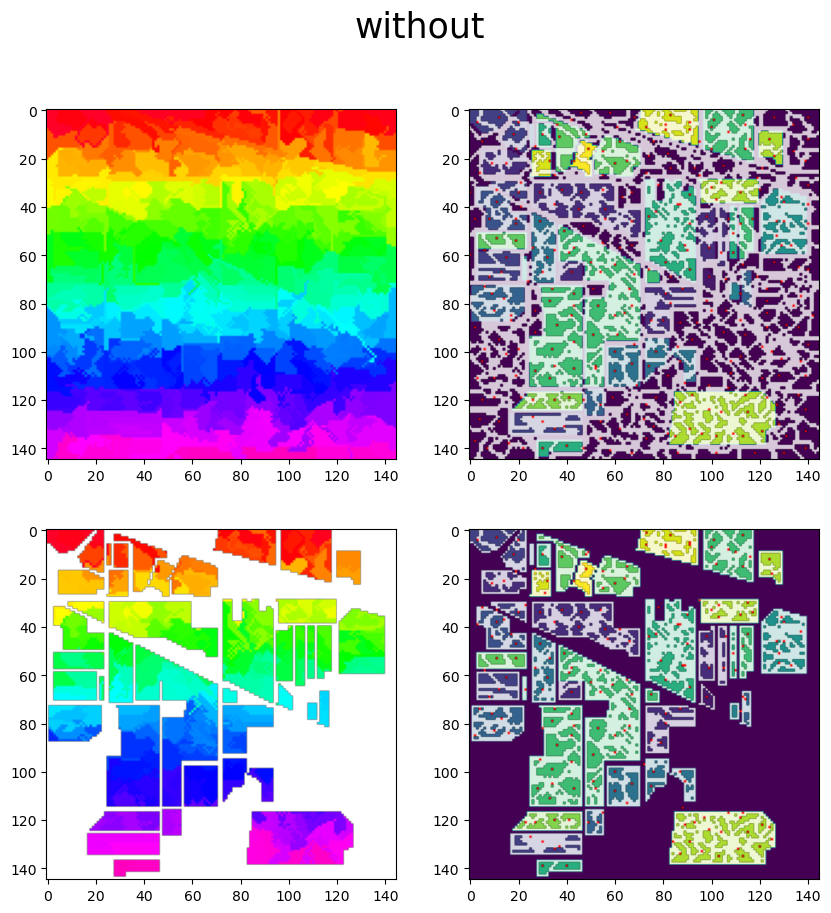

20
[4544, 1584, 274, 1604, 412, 5434, 707, 652, 82, 63, 3104, 1063, 96, 407, 242, 40, 57, 345, 121, 194]
20
[3202, 1409, 354, 383, 163, 113, 344, 783, 1361, 46, 657, 82, 20, 396, 304, 244, 32, 153, 1, 202]


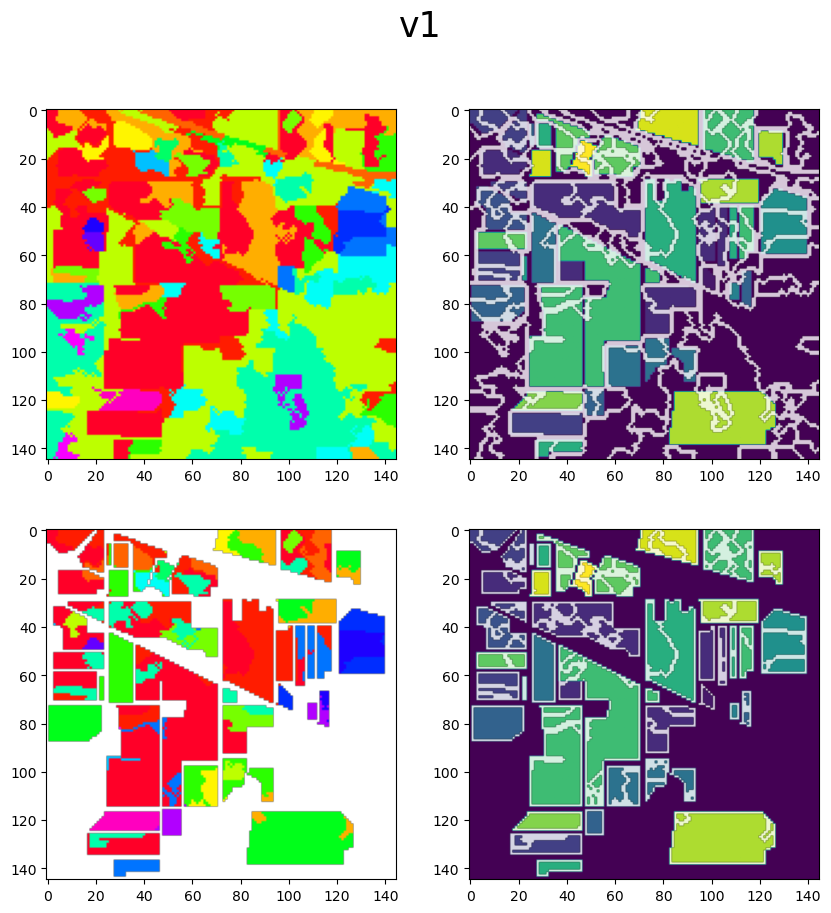

20
[1660, 926, 4359, 2999, 541, 4781, 308, 318, 1107, 63, 1132, 96, 925, 123, 352, 40, 118, 437, 660, 80]
20
[5788, 717, 953, 46, 1904, 18, 46, 1, 32, 18, 168, 32, 194, 12, 155, 1, 26, 1, 120, 17]


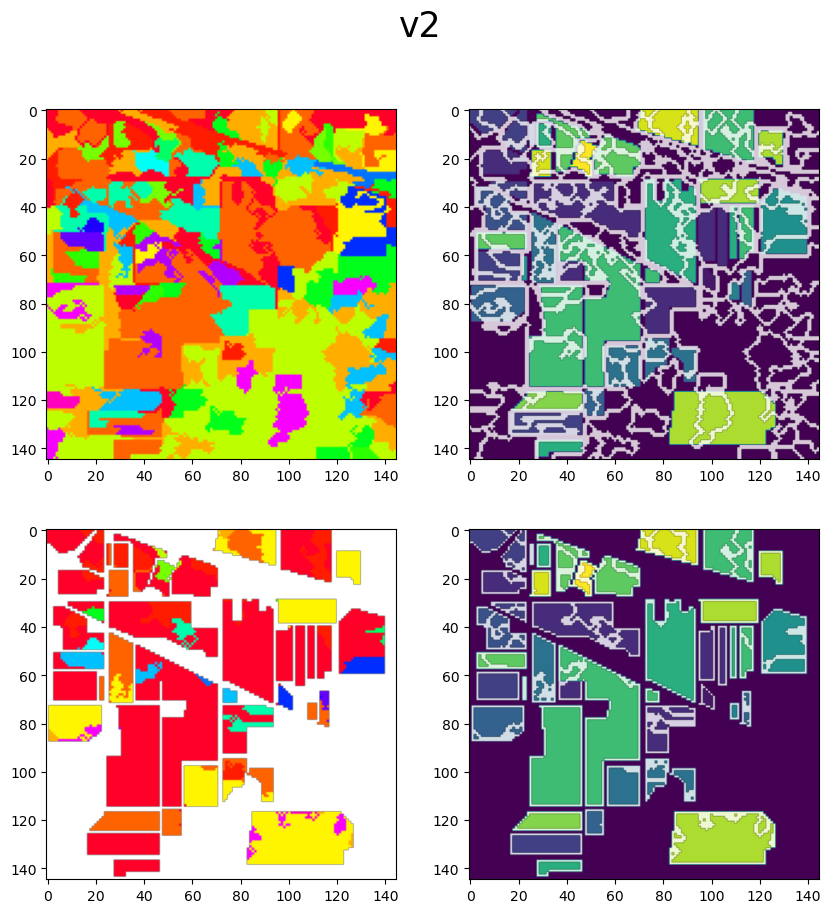

20
[5568, 395, 172, 1289, 412, 5294, 1160, 707, 805, 3415, 63, 102, 96, 407, 242, 40, 258, 345, 61, 194]
20
[3664, 375, 182, 1228, 383, 932, 162, 406, 1254, 46, 82, 167, 172, 20, 287, 304, 244, 32, 202, 107]


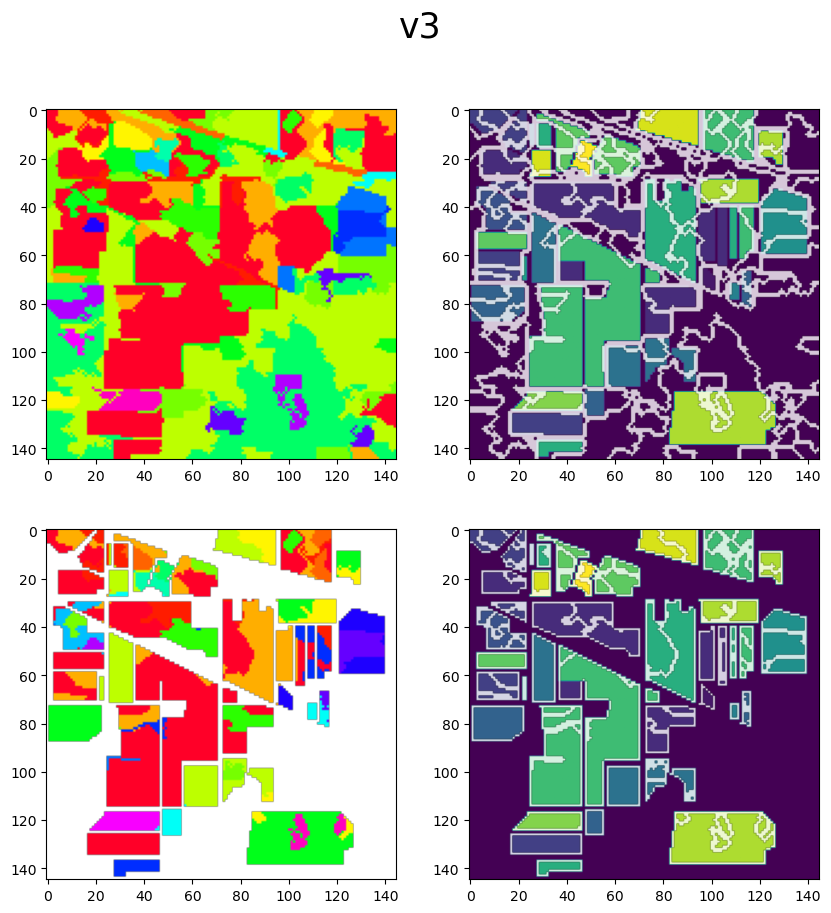

20
[1985, 699, 1869, 729, 673, 584, 2302, 1876, 40, 412, 1244, 587, 1887, 1352, 407, 1317, 223, 767, 835, 1237]
20
[1218, 1193, 397, 308, 376, 354, 1287, 202, 253, 304, 836, 46, 526, 432, 131, 1003, 458, 163, 287, 475]


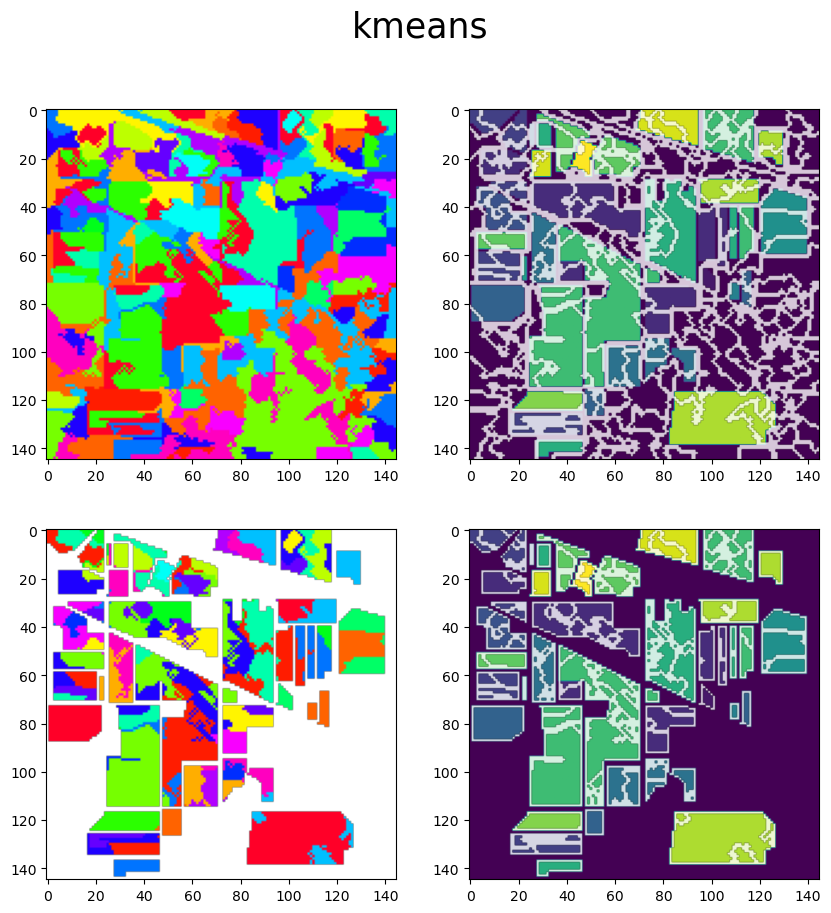

20
[2866, 3104, 708, 1288, 1362, 1063, 356, 497, 723, 992, 407, 1184, 412, 853, 159, 2190, 1275, 345, 395, 846]
20
[657, 607, 783, 376, 968, 128, 557, 355, 1268, 246, 304, 383, 202, 113, 163, 1472, 393, 788, 333, 153]


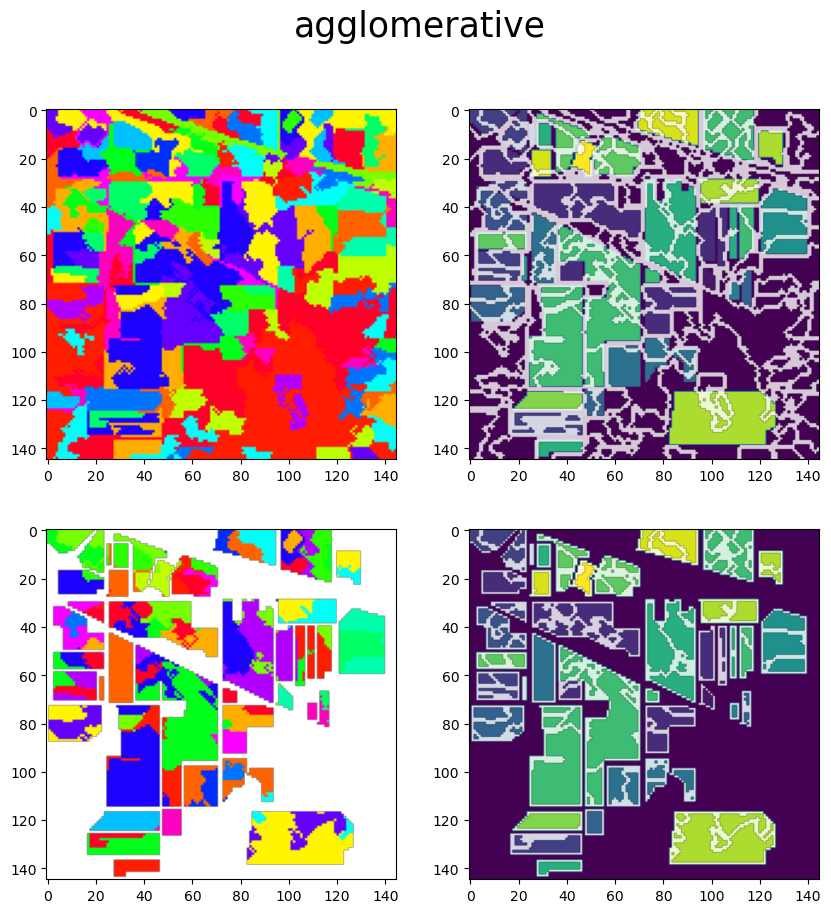

20
[1207, 996, 983, 1212, 1635, 927, 923, 835, 1152, 1159, 1413, 805, 967, 776, 905, 1510, 1055, 591, 1063, 911]
20
[510, 564, 723, 622, 354, 591, 460, 383, 555, 490, 1190, 393, 237, 333, 442, 291, 760, 335, 346, 670]


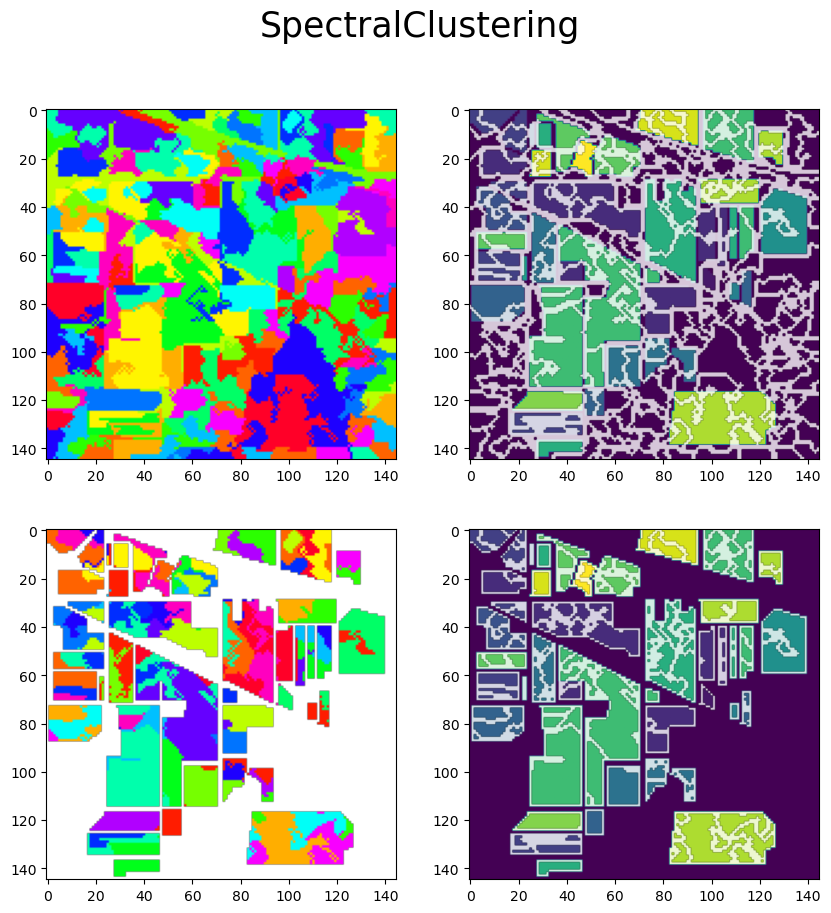

In [ ]:
length = len(merged_SPs_names)
for i in range(length):

    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    cmap = mpl.colormaps["gist_rainbow"]
    #np.random.shuffle(colors)
    n,m,_ = dataForMerges.shape

    for k,key in enumerate(mergedSPsDic.keys()):
        SPs = mergedSPsDic[key][i]
        colors = cmap(np.linspace(0, 1, len(SPs)))
        print(len(SPs))
        print([len(SP) for SP in SPs])
        img = np.zeros((n,m,len(colors[0])))
        for j,SP in enumerate(SPs):
            for x,y in SP:
                img[x,y] = colors[j]

        axs[k][0].imshow(img)

        axs[k][1].imshow(usedDataset["gt"])
        mask = ERS.create_overlay_borders(usedDataset["gt"], SPs, color=[255,255,255,200])
        if merged_SPs_names[i]=="without":
            for SP in SPs:
                x,y = np.average(SP, axis=0)
                mask[int(x), int(y)] = [255,0,0,255]
        axs[k][1].imshow(mask)

    fig.suptitle(merged_SPs_names[i], fontsize=25)
    plt.show()

### SVM

In [10]:
import sklearn.utils
from sklearn.preprocessing import StandardScaler

def split_data(dataset, percent, bands):
    for_slices = [i for i in range(len(bands)) if bands[i]==1]
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    nb_info = sum([len(liste) for key,(_,liste) in dataset["class"].items() if key!=0])
    weights = {}
    for key, (name, liste) in dataset["class"].items():
        if key !=0:
            indices = np.zeros(len(liste), dtype=int)
            indices[:int(len(liste)*percent)] = 1

            np.random.shuffle(indices)

            weights[key] = nb_info/ len(liste)
            
            for i in range(len(liste)):
                data = dataset["data"][liste[i]]
                if indices[i]==1:
                    X_train.append(data[for_slices])
                    y_train.append(key)
                else:
                    X_test.append(data[for_slices])
                    y_test.append(key)

    X_train, y_train = sklearn.utils.shuffle(X_train, y_train, random_state=42)
    X_test, y_test = sklearn.utils.shuffle(X_test, y_test, random_state=42)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), weights
   
    


from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def SVM_accuracy(X_train,y_train, X_test,y_test):
    pipeline = Pipeline([
        ('scalar', StandardScaler()),
        ('svc', svm.SVC(kernel='rbf'))
    ])

    param_grid = {
        'svc__C': [0.1, 1, 10, 100, 1000, 2000, 4000],
        'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0005, 0.0001]
    }

    clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return len([0 for i in range(len(y_pred)) if y_pred[i]==y_test[i]]) /len(y_pred)


pourcents = {
    Data.IndianPines["name"]: 0.05,
    Data.PaviaUniversity["name"]: 0.02,
    Data.PaviaCenter["name"]: 0.01
}


### SSGA

In [29]:
class Param:
    GN = 100
    NP = 100
    Pc = 0.9
    Pm1 = 0.02
    Pm2 = 0.1
    b = 60

best_bands = []
best_fitness = []
best_accuracy = []

A = 200
chooseRandom = False
trainingData = usedDataset["data"]
Ssp_list = SSGA.compute_Sbsp_Stsp_list(trainData, SPs)
for i in range(A):
    if chooseRandom:
        bands = np.zeros(B, dtype=int)
        bands[:Param.b] = 1
        np.random.shuffle(bands)
        bands_fitness = SSGA.fitness_function(bands, Ssp_list[0], Ssp_list[1])
    else:
        pop, fitness = SSGA.SSGA(trainingData, Param.b, K, Param.GN, Param.NP, Param.Pc, Param.Pm1, Param.Pm2,
                                SP=SPs, S_list=Ssp_list)
        bands = pop[0]
        bands_fitness = fitness[0]
        
    best_fitness.append(bands_fitness)
    best_bands.append(bands)
    X_train,y_train, X_test,y_test, weights = split_data(usedDataset, pourcents[usedDataset["name"]], bands)
    best_accuracy.append(SVM_accuracy(X_train,y_train, X_test,y_test))


indices = [i for i in range(A)]
indices.sort(key=lambda i:best_fitness[i])
best_bands = [best_bands[i] for i in indices]
best_fitness = [best_fitness[i] for i in indices]
best_accuracy = [best_accuracy[i] for i in indices]

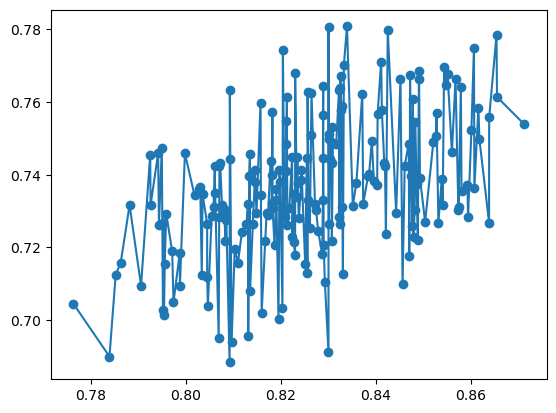

In [28]:
# Random
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

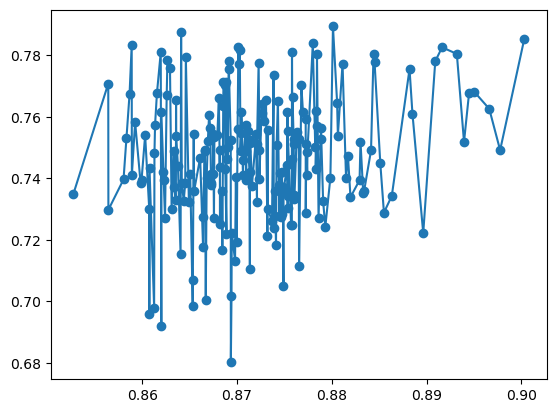

In [30]:
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

##### 9 bands

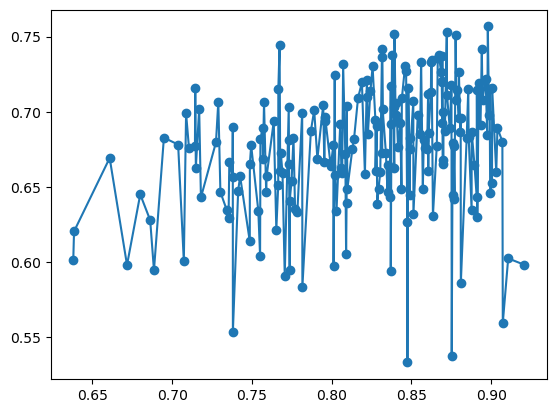

In [ ]:
# Random
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

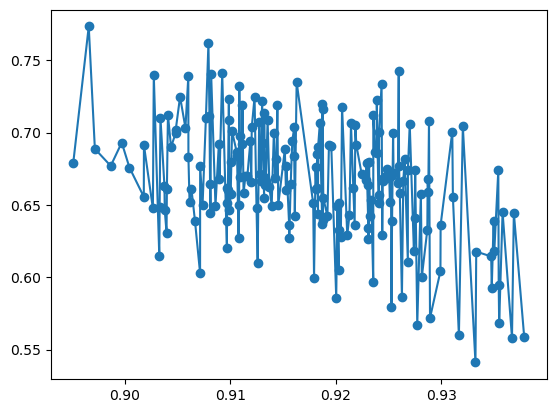

In [104]:
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

In [31]:
best = 0 
for i in range(A):
    if best_accuracy[i]>best_accuracy[best]:
        best=i
print(best)
print([i for i in range(B) if best_bands[best][i]==1])
print(best_fitness[best])
print(best_accuracy[best])

171
[7, 11, 14, 15, 17, 20, 21, 22, 24, 27, 33, 34, 35, 37, 46, 48, 58, 63, 65, 66, 70, 74, 77, 83, 98, 100, 104, 109, 111, 112, 119, 123, 125, 127, 129, 130, 131, 133, 134, 137, 138, 139, 146, 152, 156, 157, 159, 162, 164, 168, 171, 172, 173, 174, 175, 176, 177, 179, 184, 194]
0.880119143762179
0.7894088669950738


Good bands:
- Indian Pines:
    - 9: [10, 23, 40, 97, 124, 137, 147, 183, 185]
    - 60: [7, 11, 14, 15, 17, 20, 21, 22, 24, 27, 33, 34, 35, 37, 46, 48, 58, 63, 65, 66, 70, 74, 77, 83, 98, 100, 104, 109, 111, 112, 119, 123, 125, 127, 129, 130, 131, 133, 134, 137, 138, 139, 146, 152, 156, 157, 159, 162, 164, 168, 171, 172, 173, 174, 175, 176, 177, 179, 184, 194]


In [ ]:
bands = np.zeros(B, dtype=int)
bands[:Param.b] = 1
np.random.shuffle(bands)



X_train,y_train, X_test,y_test, weights = split_data(usedDataset, pourcents[usedDataset["name"]], bands)
print(SSGA.fitness_function(bands, Ssp_list[0], Ssp_list[1]))
print(SVM_accuracy(X_train,y_train, X_test,y_test))

0.8783873386713854
0.7214696223316913


In [48]:
print([i for i in range(len(bands)) if bands[i]==1])

[10, 15, 26, 27, 57, 128, 150, 186, 191]


good indiv:
- IndianPines:
    - [9, 27, 35, 39, 70, 122, 148, 172, 183]
    - [10, 23, 40, 97, 124, 137, 147, 183, 185]